# $\epsilon$ comparison

Comparison of $\epsilon$ obtained from two sources: Lund et al (2017) fitted frequencies and ``apollinaire`` fitted $\epsilon$ from the global pattern analysis.

In [1]:
from aux import *
import apollinaire as apn

In [2]:
a = np.loadtxt ('data/Kepler_K2_epsilon.txt')
df_eps = pd.DataFrame (data=a[:, 1:5], index=a[:,0].astype (np.int_), 
                       columns=['Teff', 'e_Teff', 'eps', 'e_eps'])

In [3]:
df_ref = pd.read_csv ('tables/lund_2017.csv', index_col=0)
df_ref = df_ref.loc[df_ref['KIC']!=df_ref['KIC'].iloc[-1]]
df_ref['KIC'] = df_ref['KIC'].map (np.int_)
df_ref = df_ref.set_index ('KIC')

dr25 = pd.read_csv ('/Users/sbreton/Workspace/catalogs/dr25.csv', index_col=0)
dr25 = dr25.set_index ('KIC')

df_eps = df_eps.loc[np.intersect1d (df_eps.index, df_ref.index)]
#df_eps

In [4]:
list_kic = [6603624, 5184732, 6106415, 6225718, 12069449, 12069424]
eps = []
e_eps = []
numax = []
e_numax = []
dnu = []
e_dnu = []

for kic in list_kic :
    resDir = str (kic).zfill (9)
    pattern = np.loadtxt (path.join (resDir, 'pattern.dat'))
    eps.append (pattern [0,0])
    e_eps.append (pattern [0,1])
    dnu.append (pattern [2,0])
    e_dnu.append (pattern [2,1])
    numax.append (pattern [3,0])
    e_numax.append (pattern [3,1])
    
eps = np.array (eps)
e_eps = np.array (e_eps)
dnu = np.array (dnu)
e_dnu = np.array (e_dnu)
numax = np.array (numax)
e_numax = np.array (e_numax)
kics = np.array (list_kic)



df = pd.DataFrame (data=np.c_[numax, e_numax, dnu, e_dnu, eps, e_eps], index=kics)
df = df.sort_index ()

print (df.to_latex ())

\begin{tabular}{lrrrrrr}
\toprule
{} &            0 &          1 &           2 &         3 &         4 &         5 \\
\midrule
5184732  &  2163.521549 &  35.342431 &   95.939181 &  0.148407 &  1.287041 &  0.033855 \\
6106415  &  2214.798523 &  49.579591 &  103.356273 &  0.368094 &  1.499375 &  0.078748 \\
6225718  &  2348.869861 &  54.427482 &  106.780297 &  0.430994 &  1.004861 &  0.087457 \\
6603624  &  2385.803432 &  24.232901 &  110.048245 &  0.028285 &  1.509100 &  0.005550 \\
12069424 &  2192.379179 &  21.829513 &  103.345221 &  0.039398 &  1.425530 &  0.007887 \\
12069449 &  2625.416186 &  92.890169 &  116.871166 &  0.037457 &  1.473366 &  0.006971 \\
\bottomrule
\end{tabular}



In [20]:
df_ref.columns

Index(['n', 'l', 'Freq', 'e_Freq', 'e_freq_lc', 'Amp', 'e_Amp', 'e_amp_lc',
       'Width', 'e_Width', 'e_width_lc', 'l_lnK', 'lnK'],
      dtype='object')

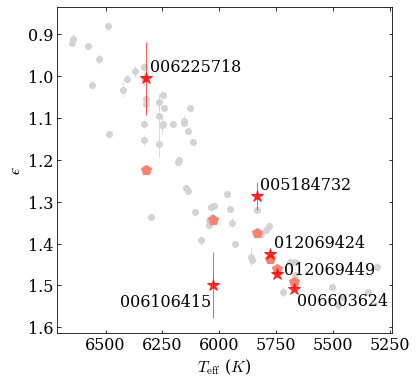

In [17]:
# Note: the discrepancies are because Dnu and epsilon are strongly anticorrelated and we do not have the same Dnu, 
# especially for 6225718 for example. Therefore, I believe my uncertainty values are smaller than 
# they should be in reality, their values are tiny...

figure, ax = plt.subplots (1, 1, figsize=(6, 6))

ax.errorbar (dr25.loc[df_eps.index, 'Teff'], df_eps['eps'], yerr=df_eps['e_eps'], fmt='o', 
             color='lightgrey', zorder=-5)
ax.errorbar (dr25.loc[list_kic, 'Teff'], df_eps.loc[list_kic, 'eps'], yerr=df_eps.loc[list_kic, 'e_eps'], 
             fmt='p', color='salmon', ms=10)
ax.errorbar (dr25.loc[list_kic, 'Teff'], eps, yerr=e_eps, 
             fmt='*', color='red', alpha=0.8, ms=12)

ax.set_ylabel (u'$\u03F5$')
ax.set_xlabel (r'$T_\mathrm{eff}$ ($K$)')

teff_sample = dr25.loc[list_kic, 'Teff'].to_numpy ()
for kic, t, e in zip (list_kic, teff_sample, eps) :
    if kic == 6106415 :
        ax.annotate (str (kic).zfill (9), (t+410, e+0.05))
    elif kic == 12069449 :
        ax.annotate (str (kic).zfill (9), (t-30, e))
    elif kic == 6603624 :
        ax.annotate (str (kic).zfill (9), (t-15, e+0.04))
    else :
        ax.annotate (str (kic).zfill (9), (t-15, e-0.017))
        
ax.invert_xaxis ()
ax.invert_yaxis ()

figure.savefig ('plots/epsilon.pdf')

In [ ]:
df_eps.loc[list_kic]